#Домашняя работа № 1
---

In [1]:
# Агупов А. Г.
# Гр. 4221
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from tensorflow import keras

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


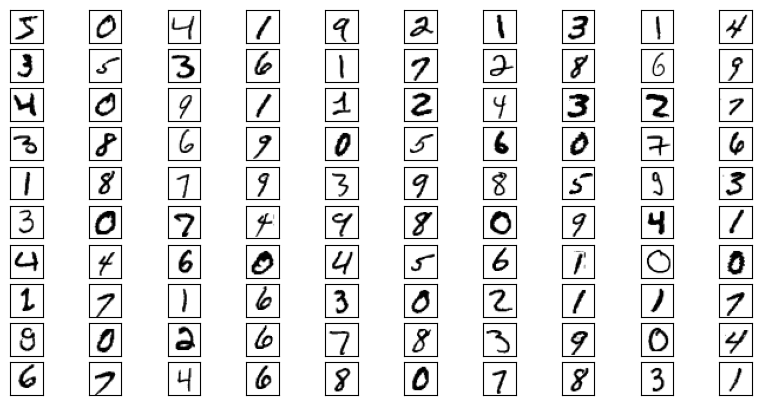

In [2]:
#Отображение первых 100 изображений из обучающей выборки

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,5))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [3]:
#Преобразование набора данных

print(y_train)

# Нормализация данных
x_train = x_train / 255
x_test = x_test / 255

# Преобразование выходных значений в векторы по категориям
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

[5 0 4 ... 5 6 8]


In [4]:
# Преобразование размерности изображений
x_train = x_train.reshape(len(x_train),len(x_train[0])*len(x_train[1]))
x_test = x_test.reshape(len(x_test),len(x_test[0])*len(x_test[1]))

In [5]:
# Создание нейросети

# Создание последовательной модели
model = keras.Sequential()

# Добавление уровней сети
model.add(Dense(784, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Компиляция модели
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# Обучение нейросети

history = model.fit(x_train, y_train, batch_size=200, epochs=100,
                    validation_split=0.2, verbose=1)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5103 - loss: 1.8047 - val_accuracy: 0.8454 - val_loss: 0.8557
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8400 - loss: 0.7852 - val_accuracy: 0.8747 - val_loss: 0.5691
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8652 - loss: 0.5753 - val_accuracy: 0.8882 - val_loss: 0.4673
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8792 - loss: 0.4844 - val_accuracy: 0.8963 - val_loss: 0.4148
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8845 - loss: 0.4437 - val_accuracy: 0.9011 - val_loss: 0.3825
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8936 - loss: 0.4004 - val_accuracy: 0.9063 - val_loss: 0.3603
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8986 - loss: 0.3736 - val_accuracy: 0.9096 - val_loss: 0.3434
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9046 - loss: 0.3574 - 

In [27]:
# Тестирование на рукописных цифрах

from PIL import Image, ImageOps
prav_otv = [4, 7, 3, 1, 9, 0, 6, 2, 5, 8]

In [8]:
# Преобразование картинок для обработки нейронной сетью

import os
image_dir = '/content/drive/MyDrive/Colab Notebooks/Tcifirki/'

image_array = []
image_array_vis = []

for filename in os.listdir(image_dir):
      img_path = os.path.join(image_dir, filename)
      img = Image.open(img_path).convert('L')

      image_array_vis.append(Image.open(img_path))

      x = np.array(img)
      x = x.reshape(1, 784)
      x = 255 - x
      x = x / 255
      image_array.append(x)

print(f"Загружено {len(image_array)} изображений")

Загружено 10 изображений


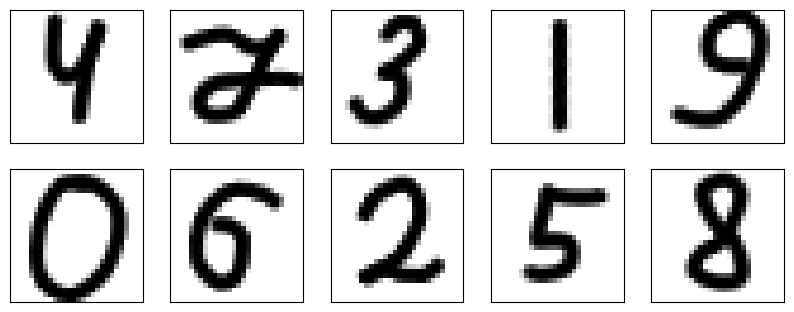

In [9]:
# Вывод рукописных картинок
plt.figure(figsize=(10,10))
for i in range(len(image_array)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_array_vis[i], cmap=plt.cm.binary)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Картинка № 0 - полученный ответ = 4 / правильный ответ = 4
Картинка № 1 - полученный ответ = 2 / правильный ответ = 7
Картинка № 2 - полученный ответ = 3 / правильный ответ = 3
Картинка № 3 - полученный ответ = 1 / правильный ответ = 1
Картинка № 4 - полученный ответ = 5 / правильный ответ = 9
Картинка № 5 - полученный ответ = 3 / правильный ответ = 0
Картинка № 6 - полученный ответ = 5 / правильный ответ = 6
Картинка № 7 - полученный ответ = 2 / правильный ответ = 2
Картинка № 8 - полученный ответ = 5 / правильный ответ = 5
Картинка № 9 - полученный ответ = 8 / правильный ответ = 8


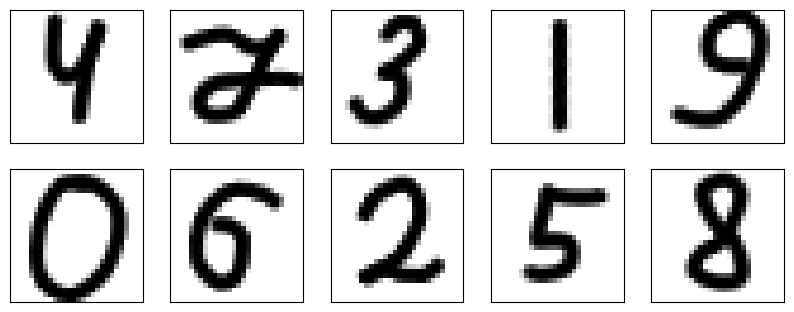

In [28]:
otv = []
for x in range(len(image_array)):
  # Распознавание
  otv.append(np.argmax(model.predict(image_array[x])))

# Результат распознавания
print()
zip(otv, prav_otv)

for i in range(len(otv)):
    print(f"Картинка № {i} - полученный ответ = {otv[i]} / правильный ответ = {prav_otv[i]}")

plt.figure(figsize=(10,10))
for i in range(len(image_array)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_array_vis[i], cmap=plt.cm.binary)

plt.show()

##Выводы по полученной модели


Полученная модель в большинстве случаев делает правильные прогноз, но у неё возникают проблемы если:
* размер цифры больше чем на тренировочной выборке, т.е. она касается границ изображения (пример "0" и "9")
* при распознавании цифр, написанных специфическим подчерком (пример "7")